In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
from scipy import stats

pd.set_option ('display.max_columns', None)

In [55]:
from google.colab import files

uploaded = files.upload()

Saving stats_and_contracts.csv to stats_and_contracts (1).csv


In [56]:
df= pd.read_csv(io.BytesIO(uploaded['stats_and_contracts.csv']))

In [57]:
#### import our dataset
#df= pd.read_csv('stats_and_contracts.csv')
df= df.drop(columns='Unnamed: 0')
df['AAV']= df['AAV'].astype('float')
df= df[df['GP']>10]
df['PPG']= df['PTS']/df['GP']
df= df[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D',
       'Pos_G', 'GP', 'G', 'A', 'PTS', 'PPG', 'PlusMinus', 'ATOI', 'TOI(EV)', 'PIM',
       'PS', 'EV_A', 'PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW',
       'FOL', 'FO_Pct', 'CF', 'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA',
       'FF_Pct', 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct',
       'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored',
       'SOT_Saved', 'SOT_Pct', 'GS', 'W', 'L', 'TplusOTL', 'GA', 'SA', 'SV',
       'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'TYPE', 'LENGTH',
       'AAV']]

In [58]:
df2=df
df2.AGE= df2.AGE.astype('category')

In [59]:
df2.AGE.dtype

CategoricalDtype(categories=[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                  35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
                 ordered=False)

Text(0.5, 1.0, 'Salary vs Age')

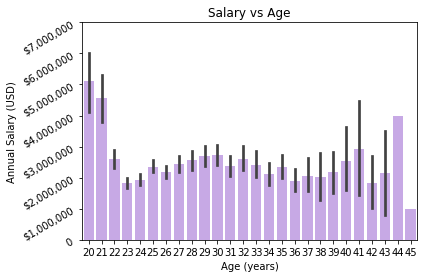

In [60]:
fig=sns.barplot(data=df2, x='AGE', y='AAV', order=[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                  35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], color='#C79FEF')
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000']
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
fig.set_xlabel('Age (years)')
fig.set_ylabel('Annual Salary (USD)')
fig.set_title('Salary vs Age')

In [61]:
df[df['AGE']==41].sort_values('AAV', ascending=False).query('AAV>3000000')

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
2509,Nicklas Lidstrom,2011,41,0,0,0,1,0,80.666667,13.666667,43.000000,56.666667,0.702479,17.000000,24.572222,17.400000,24.666667,10.466667,6.333333,7.333333,0.000000,2.000000,183.000000,7.533333,80.000000,49.333333,0.0,0.000000,0.000000,1460.000000,1164.666667,55.666667,1.000000,1133.333333,932.333333,54.866667,1.000000,8.800000,91.666667,100.500000,50.266667,49.733333,31.333333,43.666667,370.000000,49.033333,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35+,1,6200000.0
778,Zdeno Chara,2018,41,0,0,0,1,0,76.000000,8.666667,21.333333,30.000000,0.394737,17.333333,23.444444,18.944444,63.333333,7.200000,7.333333,0.666667,0.666667,2.000000,146.000000,6.000000,127.000000,135.000000,0.0,0.666667,0.000000,1404.666667,1327.333333,51.466667,-1.900000,1066.333333,1000.000000,51.700000,-1.966667,9.300000,91.566667,100.866667,44.533333,55.466667,33.333333,74.333333,304.333333,47.933333,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35+,1,5000000.0
2143,Teemu Selanne,2012,41,0,0,1,0,0,69.666667,28.000000,36.666667,64.666667,0.928230,2.666667,17.711111,13.977778,38.333333,8.200000,14.000000,14.000000,0.000000,4.666667,198.666667,14.200000,17.666667,17.333333,101.0,114.333333,46.766667,837.000000,897.333333,48.300000,1.233333,642.333333,696.000000,47.966667,0.633333,9.866667,92.000000,101.866667,49.766667,50.233333,27.666667,42.333333,317.000000,62.466667,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35+,1,4500000.0


In [62]:
df[df['AGE']==44]

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
1271,Jaromir Jagr,2016,44,0,0,1,0,0,79.333333,22.666667,37.333333,60.0,0.756303,12.0,17.938889,15.205556,47.333333,7.633333,18.0,4.666667,0.0,5.0,181.0,13.133333,13.0,21.666667,0.333333,1.0,33.333333,1077.0,912.666667,54.066667,4.833333,820.333333,709.666667,53.566667,4.533333,9.933333,91.166667,101.133333,53.566667,46.433333,35.666667,49.666667,313.0,57.533333,2.0,0.333333,1.666667,5.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35+,1,4000000.0


In [108]:
print("under 3yrs %s "  % df[df['LENGTH']<= 3]["AAV"].mean())
print("over 3yrs %s " % df[df['LENGTH']> 3]["AAV"].mean())

under 3yrs 1683336.0733506945 
over 3yrs 4951314.055183946 


Text(0.5, 1.0, 'Season vs AAV')

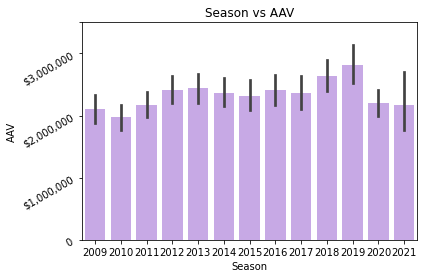

In [113]:
fig=sns.barplot(data=df, x='Season', y='AAV',color='#C79FEF')
ticks=[0, 1000000,2000000,3000000,3500000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000']
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
fig.set_title('Season vs AAV')

**SKATERS**

In [63]:
# create player df

pdf= df[df['Pos_G'] != 1]
pdf= pdf[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D', 'GP', 'G', 'A', 'PTS','PPG', 'PlusMinus', 'ATOI', 
          'TOI(EV)', 'PIM', 'PS', 'EV_A','PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'CF',
          'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA', "FF_Pct", 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct', 
          'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored', 'SOT_Saved', 'SOT_Pct', 'TYPE',
         'LENGTH', 'AAV']]
pdf= pdf.reset_index()
pdf= pdf.drop(columns=['index', 'TYPE'])

### filter for players with more than 10 games
pdf= pdf[pdf['GP']>10]

In [64]:
small_pdf= pdf
small_pdf['Position']=''

small_pdf= small_pdf.assign(Position=['Defense' if x==1 else 'Forward' for x in small_pdf['Pos_D']])


small_pdf= small_pdf[['Player','Position','PTS', 'EV_A','GW','PlusMinus', 'S', 'BLK','HIT','FF','oiSV_Pct','TK','AAV']]
small_pdf

,Player,Position,PTS,EV_A,GW,PlusMinus,S,BLK,HIT,FF,oiSV_Pct,TK,AAV
0,Wayne Simmonds,Forward,21.333333,6.333333,1.000000,-13.333333,112.666667,24.000000,115.333333,499.333333,91.733333,22.333333,900000.0
1,Ryan Nugent-Hopkins,Forward,55.000000,13.666667,3.000000,-5.333333,171.666667,37.666667,42.666667,667.666667,90.600000,45.000000,5125000.0
2,Trent Frederic,Forward,1.666667,1.333333,1.000000,-4.333333,21.333333,6.000000,29.000000,113.333333,91.233333,4.666667,1050000.0
3,Blake Lizotte,Forward,11.000000,1.666667,0.000000,-1.000000,43.333333,14.666667,24.666667,302.666667,87.766667,9.666667,800000.0
4,Matt Nieto,Forward,17.000000,4.666667,1.333333,1.333333,72.000000,22.666667,37.333333,420.000000,91.466667,15.000000,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,Andy McDonald,Forward,44.000000,8.000000,1.000000,-13.000000,128.000000,18.000000,24.000000,473.000000,86.500000,18.000000,4700000.0
2617,George Parros,Forward,10.000000,5.000000,0.000000,8.000000,47.000000,14.000000,89.000000,268.000000,94.100000,6.000000,875000.0
2618,Henrik Zetterberg,Forward,73.000000,17.000000,5.000000,13.000000,309.000000,31.000000,54.000000,961.000000,90.900000,42.000000,6083333.0
2619,Brendan Shanahan,Forward,14.000000,4.000000,1.000000,-2.000000,77.000000,21.000000,18.000000,232.000000,93.300000,14.000000,800000.0


In [65]:
bins=[]
for p in range(0, len(small_pdf['PTS'])):
  if small_pdf['PTS'][p] < 10:
    bins.append('0-9')
  elif 10 <= small_pdf['PTS'][p] < 20:
    bins.append('10-19')
  elif 20 <= small_pdf['PTS'][p] < 30:
    bins.append('20-29')
  elif 30 <= small_pdf['PTS'][p] < 40:
    bins.append('30-39')
  elif 40 <= small_pdf['PTS'][p] < 50:
    bins.append('40-49')
  elif 50 <= small_pdf['PTS'][p] < 60:
    bins.append('50-59')
  elif 60 <= small_pdf['PTS'][p] < 70:
    bins.append('60-69')
  elif 70 <= small_pdf['PTS'][p] < 80:
    bins.append('70-79')
  elif 80 <= small_pdf['PTS'][p] < 90:
    bins.append('80-89')
  elif 90 <= small_pdf['PTS'][p] < 100:
    bins.append('90-99')

In [66]:
small_pdf['pt_bins']=bins

Text(0.5, 1.0, 'Skater Points vs Expected Salary')

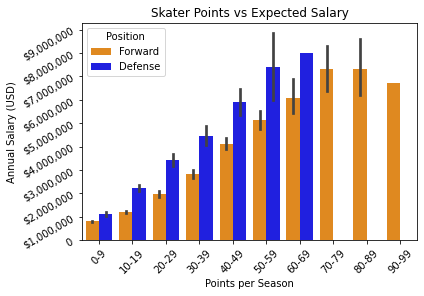

In [67]:
colors=['#FF8C00','#0000FF']
sns.set_palette(colors)

fig= sns.barplot(data=small_pdf, x='pt_bins', y='AAV', hue= 'Position',
            order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])
fig.set_xticklabels(rotation=45, labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000']
fig.set_xlabel('Points per Season')
fig.set_ylabel('Annual Salary (USD)')
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
fig.set_title('Skater Points vs Expected Salary')

Text(0.5, 1.0, 'Fig.8) Number Game Winning Goals vs Expected Salary')

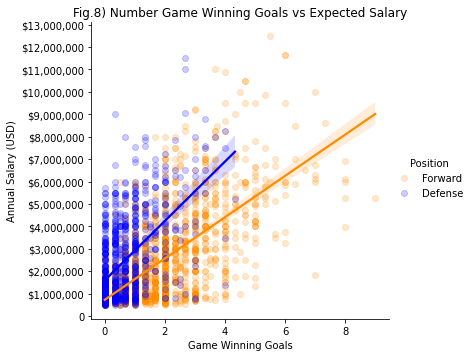

In [68]:
colors=['#FF8C00','#0000FF']
sns.set_palette(colors)


fig= sns.lmplot(data=small_pdf, x='GW', y='AAV', hue= 'Position', fit_reg=True, scatter_kws={'alpha': 0.2})



ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']

plt.xlabel('Game Winning Goals')

plt.ylabel('Annual Salary (USD)')
plt.yticks(ticks=ticks, labels=labels)
#plt.yticklabels(labels=labels)
plt.title('Fig.8) Number Game Winning Goals vs Expected Salary')

Text(0.5, 1.0, 'Fig.9) Number Even-Strength Assists vs Expected Salary')

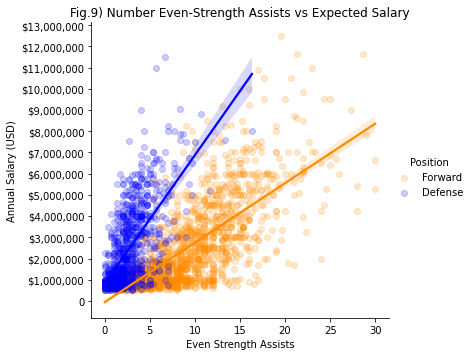

In [69]:
colors=['#FF8C00','#0000FF']
sns.set_palette(colors)


fig= sns.lmplot(data=small_pdf, x='EV_A', y='AAV', hue= 'Position', fit_reg=True, scatter_kws={'alpha': 0.2})



ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']

plt.xlabel('Even Strength Assists')

plt.ylabel('Annual Salary (USD)')
plt.yticks(ticks=ticks, labels=labels)
#plt.yticklabels(labels=labels)
plt.title('Fig.9) Number Even-Strength Assists vs Expected Salary')

Text(0.5, 1.0, 'Fenwick-For vs Expected Salary')

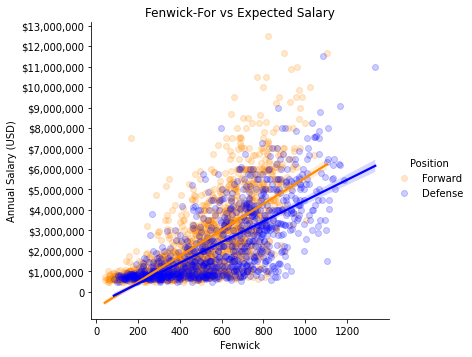

In [70]:
colors=['#FF8C00','#0000FF']
sns.set_palette(colors)


fig= sns.lmplot(data=small_pdf, x='FF', y='AAV', hue= 'Position', fit_reg=True, scatter_kws={'alpha': 0.2})



ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']

plt.xlabel('Fenwick')

plt.ylabel('Annual Salary (USD)')
plt.yticks(ticks=ticks, labels=labels)
#plt.yticklabels(labels=labels)
plt.title('Fenwick-For vs Expected Salary')

In [71]:
pdf.head()


,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
0,Wayne Simmonds,2021,32,0,1,1,0,61.666667,10.666667,10.666667,21.333333,0.345946,-13.333333,14.188889,12.458333,70.000000,1.166667,6.333333,4.333333,0.000000,1.000000,112.666667,9.600000,24.000000,115.333333,13.000000,21.333333,37.566667,670.666667,716.333333,48.9,-0.533333,499.333333,519.000000,49.833333,-0.066667,6.500000,91.733333,98.233333,49.300000,50.700000,22.333333,25.000000,231.5,59.566667,0.333333,0.0,0.333333,0.000000,2,900000.0,
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,66.333333,22.000000,33.000000,55.000000,0.829146,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.000000,0.333333,3.000000,171.666667,12.733333,37.666667,42.666667,219.000000,249.000000,47.133333,893.000000,966.333333,48.6,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,8,5125000.0,
2,Trent Frederic,2021,23,1,1,0,0,19.666667,1.333333,0.333333,1.666667,0.084746,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.000000,0.000000,1.000000,21.333333,3.033333,6.000000,29.000000,26.000000,24.333333,34.500000,150.666667,171.333333,35.2,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,2,1050000.0,
3,Blake Lizotte,2021,23,1,0,0,0,35.666667,3.000000,8.000000,11.000000,0.308411,-1.000000,12.622222,11.516667,12.000000,0.700000,1.666667,0.666667,0.666667,0.000000,43.333333,4.666667,14.666667,24.666667,165.333333,162.666667,50.333333,402.000000,348.333333,56.5,10.633333,302.666667,257.666667,56.633333,11.666667,4.633333,87.766667,92.366667,45.933333,54.066667,9.666667,9.000000,80.0,53.200000,0.000000,0.0,0.000000,0.000000,1,800000.0,
4,Matt Nieto,2021,28,0,1,1,0,54.000000,5.666667,11.333333,17.000000,0.314815,1.333333,13.755556,10.966667,6.000000,1.066667,4.666667,0.000000,1.000000,1.333333,72.000000,8.400000,22.666667,37.333333,5.000000,4.666667,50.000000,570.666667,568.333333,49.0,-0.800000,420.000000,414.666667,49.333333,-0.733333,8.033333,91.466667,99.500000,43.266667,56.733333,15.000000,11.000000,139.5,66.700000,0.000000,0.0,0.000000,0.000000,2,850000.0,


In [72]:
wingers= pdf.query('(Pos_C==0 and Pos_RW==1 or Pos_LW==1 and Pos_D==0)')
wingers.head()

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
0,Wayne Simmonds,2021,32,0,1,1,0,61.666667,10.666667,10.666667,21.333333,0.345946,-13.333333,14.188889,12.458333,70.000000,1.166667,6.333333,4.333333,0.000000,1.000000,112.666667,9.600000,24.000000,115.333333,13.0,21.333333,37.566667,670.666667,716.333333,48.900000,-0.533333,499.333333,519.000000,49.833333,-0.066667,6.500000,91.733333,98.233333,49.300000,50.700000,22.333333,25.000000,231.5,59.566667,0.333333,0.0,0.333333,0.000000,2,900000.0,
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,66.333333,22.000000,33.000000,55.000000,0.829146,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.000000,0.333333,3.000000,171.666667,12.733333,37.666667,42.666667,219.0,249.000000,47.133333,893.000000,966.333333,48.600000,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,8,5125000.0,
2,Trent Frederic,2021,23,1,1,0,0,19.666667,1.333333,0.333333,1.666667,0.084746,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.000000,0.000000,1.000000,21.333333,3.033333,6.000000,29.000000,26.0,24.333333,34.500000,150.666667,171.333333,35.200000,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,2,1050000.0,
4,Matt Nieto,2021,28,0,1,1,0,54.000000,5.666667,11.333333,17.000000,0.314815,1.333333,13.755556,10.966667,6.000000,1.066667,4.666667,0.000000,1.000000,1.333333,72.000000,8.400000,22.666667,37.333333,5.0,4.666667,50.000000,570.666667,568.333333,49.000000,-0.800000,420.000000,414.666667,49.333333,-0.733333,8.033333,91.466667,99.500000,43.266667,56.733333,15.000000,11.000000,139.5,66.700000,0.000000,0.0,0.000000,0.000000,2,850000.0,
5,Blake Comeau,2021,35,0,1,1,0,61.000000,6.333333,9.666667,16.000000,0.262295,-8.666667,15.466667,13.041667,38.333333,0.600000,6.000000,0.000000,0.333333,1.333333,84.000000,7.666667,27.333333,140.333333,40.0,47.666667,45.300000,695.333333,735.000000,48.933333,-1.766667,498.666667,537.333333,48.333333,-2.433333,5.900000,91.300000,97.233333,33.800000,66.200000,27.000000,26.666667,149.5,58.400000,0.000000,0.0,0.000000,0.000000,1,1000000.0,


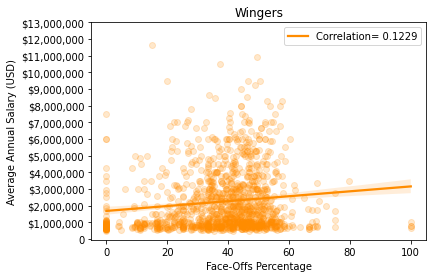

In [99]:
slope, intercept, r_value, p_value, std_err = stats.linregress(wingers['FO_Pct'],wingers['AAV'])

sns.regplot(data= wingers, x='FO_Pct', y='AAV', color='#FF8C00',scatter_kws={'alpha': 0.2}, line_kws={'label':"Correlation= %.4f" % r_value})

ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']
plt.yticks(ticks=ticks, labels=labels)
plt.xlabel("Face-Offs Percentage")
plt.ylabel('Average Annual Salary (USD)')
plt.title('Wingers')
plt.legend()


In [103]:
wingers[wingers['FO_Pct']>70]

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
92,Ilya Mikheyev,2020,25,0,1,1,0,39.000000,8.0,15.0,23.0,0.589744,7.000000,15.583333,13.316667,4.000000,2.300000,7.000000,0.000000,1.000000,1.000000,98.000000,8.200000,13.000000,26.000000,3.000000,1.000000,75.000000,574.000000,487.000000,54.100000,1.900000,443.000000,386.000000,53.400000,2.400000,9.600000,91.700000,101.300000,48.200000,51.800000,24.000000,14.000000,173.000000,56.600000,1.000000,0.000000,1.000000,0.00,2,1645000.0,
196,Yakov Trenin,2020,23,1,1,0,0,21.000000,2.0,4.0,6.0,0.285714,1.000000,9.733333,9.700000,9.000000,0.500000,2.000000,0.000000,0.000000,0.000000,25.000000,8.000000,9.000000,46.000000,3.000000,1.000000,75.000000,195.000000,194.000000,50.100000,1.000000,137.000000,124.000000,52.500000,2.200000,10.000000,90.200000,100.200000,42.200000,57.800000,7.000000,3.000000,45.000000,55.600000,0.000000,0.000000,0.000000,0.00,2,725000.0,
758,Pontus Aberg,2017,23,0,1,1,0,15.000000,1.0,1.0,2.0,0.133333,-2.000000,12.333333,12.083333,4.000000,-0.100000,1.000000,0.000000,0.000000,0.000000,12.000000,8.300000,2.000000,9.000000,1.000000,0.000000,100.000000,138.000000,159.000000,46.500000,-6.200000,104.000000,117.000000,47.100000,-4.900000,6.600000,92.100000,98.700000,48.300000,51.700000,5.000000,2.000000,24.000000,50.000000,0.000000,0.000000,0.000000,0.00,2,650000.0,
1168,Mike Hoffman,2015,25,0,1,1,0,35.666667,10.0,8.0,18.0,0.504673,4.333333,13.350000,11.961111,6.000000,2.466667,9.333333,0.666667,0.000000,1.333333,88.666667,6.166667,14.000000,22.000000,5.000000,3.333333,72.233333,450.333333,395.333333,53.733333,1.133333,327.333333,301.333333,51.766667,-0.233333,5.133333,94.166667,99.300000,55.700000,44.300000,25.333333,18.333333,166.666667,51.733333,1.666667,0.000000,1.666667,0.00,1,2000000.0,
1292,Mark Stone,2015,23,0,0,1,0,34.333333,10.0,14.0,24.0,0.699029,8.333333,13.833333,11.705556,6.666667,3.200000,7.666667,2.000000,0.333333,2.000000,65.333333,9.233333,20.000000,23.000000,3.000000,3.666667,79.633333,462.000000,404.333333,55.100000,5.166667,343.000000,315.333333,53.666667,4.966667,8.233333,92.000000,100.266667,53.000000,47.000000,39.333333,17.000000,113.000000,53.400000,1.000000,0.333333,0.666667,11.10,3,3500000.0,
1384,Justin Fontaine,2014,26,0,0,1,0,66.000000,13.0,8.0,21.0,0.318182,6.000000,12.250000,11.200000,26.000000,2.700000,12.000000,1.000000,0.000000,1.000000,79.000000,16.500000,23.000000,9.000000,2.000000,0.000000,100.000000,545.000000,649.000000,45.600000,-6.400000,394.000000,474.000000,45.400000,-7.100000,9.000000,94.500000,103.500000,41.700000,58.300000,24.000000,14.000000,141.000000,56.000000,1.000000,1.000000,0.000000,100.00,2,1000000.0,
1387,Tomas Tatar,2014,23,0,1,1,0,45.500000,11.5,11.5,23.0,0.505495,7.000000,12.858333,10.783333,17.000000,3.150000,10.000000,1.500000,0.000000,1.500000,95.000000,12.250000,12.500000,45.000000,13.500000,13.000000,75.000000,516.000000,391.000000,58.500000,9.500000,384.500000,298.500000,57.850000,8.950000,9.450000,91.150000,100.600000,55.300000,44.700000,23.000000,10.500000,168.000000,56.350000,4.500000,1.500000,3.000000,16.65,3,2750000.0,
1469,Luke Gazdic,2014,24,0,1,0,0,67.000000,2.0,2.0,4.0,0.059701,-8.000000,5.800000,5.750000,127.000000,-0.300000,2.000000,0.000000,0.000000,0.000000,30.000000,6.700000,22.000000,103.000000,3.000000,0.000000,100.000000,247.000000,423.000000,36.900000,-11.400000,173.000000,321.000000,35.000000,-12.500000,4.900000,93.900000,98.800000,52.500000,47.500000,6.000000,11.000000,51.000000,58.800000,0.000000,0.000000,0.000000,0.00,2,800000.0,
1563,Ryan Reaves,2014,26,0,0,1,0,55.333333,3.0,3.0,6.0,0.108434,0.666667,7.500000,7.422222,109.666667,0.400000,3.000000,0.000000,0.000000,0.666667,27.000000,11.366667,8.666667,172.333333,3.333333,1.000000,75.000000,

In [74]:
centers= pdf.query('(Pos_C==1 and Pos_RW==0 and Pos_LW==1 and Pos_D==0)')
centers.head()

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,66.333333,22.000000,33.000000,55.000000,0.829146,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.0,0.333333,3.000000,171.666667,12.733333,37.666667,42.666667,219.000000,249.000000,47.133333,893.000000,966.333333,48.600000,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,8,5125000.0,
2,Trent Frederic,2021,23,1,1,0,0,19.666667,1.333333,0.333333,1.666667,0.084746,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.0,0.000000,1.000000,21.333333,3.033333,6.000000,29.000000,26.000000,24.333333,34.500000,150.666667,171.333333,35.200000,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,2,1050000.0,
18,Scott Laughton,2021,27,1,1,0,0,61.333333,11.333333,15.000000,26.333333,0.429348,5.000000,14.955556,12.516667,39.333333,2.400000,11.000000,0.0,0.333333,1.333333,97.666667,12.300000,35.333333,132.000000,233.666667,212.000000,52.366667,654.333333,751.333333,47.100000,-5.133333,494.000000,549.000000,47.800000,-4.166667,10.033333,92.300000,102.300000,41.366667,58.633333,28.000000,26.666667,166.0,63.166667,0.333333,0.0,0.333333,0.000000,5,3000000.0,
19,Alex Iafallo,2021,27,1,1,0,0,69.000000,15.000000,20.333333,35.333333,0.512077,-8.000000,18.550000,14.841667,13.333333,3.066667,11.000000,4.0,0.000000,2.333333,136.000000,11.033333,46.666667,54.000000,6.666667,11.333333,35.200000,922.000000,926.333333,50.133333,0.466667,690.666667,698.666667,49.933333,0.500000,9.000000,89.833333,98.800000,47.733333,52.266667,19.666667,13.000000,234.0,62.066667,1.000000,0.0,1.000000,0.000000,4,4000000.0,
35,Riley Sheahan,2021,28,1,1,0,0,67.000000,7.000000,8.666667,15.666667,0.233831,-10.000000,13.188889,10.775000,10.333333,0.566667,6.000000,0.0,1.000000,1.000000,74.666667,9.566667,30.666667,38.333333,341.666667,333.333333,50.733333,578.333333,718.000000,44.500000,-4.066667,449.666667,537.333333,45.433333,-3.366667,7.566667,90.533333,98.100000,34.766667,65.233333,32.000000,19.000000,136.5,65.033333,0.000000,0.0,0.000000,0.000000,1,700000.0,


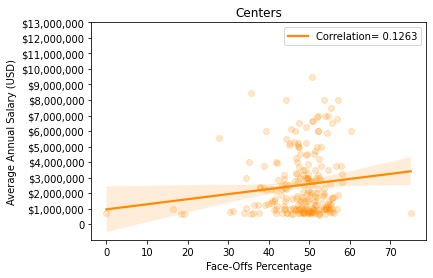

In [100]:
slope, intercept, r_value, p_value, std_err = stats.linregress(centers['FO_Pct'],centers['AAV'])

sns.regplot(data= centers, x='FO_Pct', y='AAV', color='#FF8C00',scatter_kws={'alpha': 0.2}, line_kws={'label':"Correlation= %.4f" % r_value})

ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']
plt.yticks(ticks=ticks, labels=labels)
plt.xlabel("Face-Offs Percentage")
plt.ylabel('Average Annual Salary (USD)')
plt.title('Centers')
plt.legend()


In [102]:
centers[centers['FO_Pct']>70]

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
196,Yakov Trenin,2020,23,1,1,0,0,21.0,2.0,4.0,6.0,0.285714,1.0,9.733333,9.7,9.0,0.5,2.0,0.0,0.0,0.0,25.0,8.0,9.0,46.0,3.0,1.0,75.0,195.0,194.0,50.1,1.0,137.0,124.0,52.5,2.2,10.0,90.2,100.2,42.2,57.8,7.0,3.0,45.0,55.6,0.0,0.0,0.0,0.0,2,725000.0,


In [105]:
defense= pdf.query('(Pos_C==0 and Pos_RW==0 and  Pos_LW==0 and Pos_D==1)')
defense.head()

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PPG,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV,Position
10,Artem Zub,2021,25,0,0,0,1,47.000000,3.000000,11.000000,14.000000,0.297872,4.000000,18.383333,NaN,26.000000,2.800000,3.000000,0.0,0.0,1.000000,39.000000,7.700000,70.000000,89.000000,0.0,0.0,0.0,651.000000,677.000000,49.000000,1.000000,496.000000,502.000000,49.700000,1.900000,12.100000,89.500000,101.600000,36.900000,63.100000,8.000000,36.000000,NaN,45.900000,0.0,0.0,0.0,0.0,2,2500000.0,
12,Ryan Lindgren,2021,23,0,0,0,1,38.666667,0.666667,9.333333,10.000000,0.258621,10.000000,17.050000,14.100000,30.000000,2.266667,0.666667,0.0,0.0,0.000000,40.000000,1.200000,43.000000,67.666667,0.0,0.0,0.0,499.333333,533.333333,46.266667,2.066667,374.666667,396.000000,46.800000,1.233333,8.966667,88.033333,96.933333,56.066667,43.933333,15.666667,17.333333,50.5,63.466667,0.0,0.0,0.0,0.0,3,3000000.0,
13,Riley Stillman,2021,23,0,0,0,1,18.666667,0.333333,1.666667,2.000000,0.107143,0.666667,15.283333,14.008333,10.666667,0.500000,0.333333,0.0,0.0,0.000000,23.000000,1.133333,28.666667,38.333333,0.0,0.0,0.0,255.000000,281.666667,56.400000,9.433333,191.000000,210.000000,53.033333,6.666667,10.833333,83.766667,94.600000,40.033333,59.966667,6.000000,15.000000,42.5,49.900000,0.0,0.0,0.0,0.0,3,1350000.0,
15,Ilya Lyubushkin,2021,27,0,0,0,1,44.666667,0.333333,3.000000,3.333333,0.074627,-6.000000,14.538889,13.608333,13.666667,0.800000,0.333333,0.0,0.0,0.000000,34.666667,0.933333,62.000000,134.666667,0.0,0.0,0.0,554.333333,606.666667,47.600000,-1.466667,416.666667,451.333333,47.900000,-1.433333,6.533333,92.266667,98.833333,48.633333,51.366667,9.000000,18.333333,77.0,45.933333,0.0,0.0,0.0,0.0,1,1350000.0,
23,Matt Roy,2021,26,0,0,0,1,46.333333,2.666667,8.666667,11.333333,0.244604,5.000000,18.166667,16.058333,8.666667,3.000000,2.666667,0.0,0.0,0.333333,67.666667,4.333333,71.333333,77.000000,0.0,0.0,0.0,725.666667,701.333333,48.866667,-1.000000,548.666667,529.333333,48.833333,-0.333333,9.700000,91.600000,101.333333,48.466667,51.533333,5.000000,28.333333,159.0,43.333333,0.0,0.0,0.0,0.0,3,3150000.0,


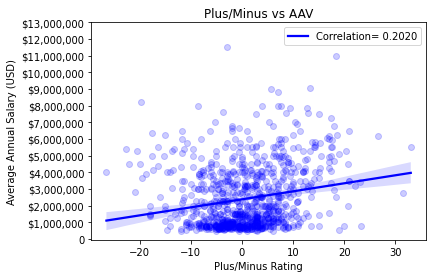

In [114]:
slope, intercept, r_value, p_value, std_err = stats.linregress(defense['PlusMinus'],defense['AAV'])

sns.regplot(data= defense, x='PlusMinus', y='AAV', color='#0000FF',scatter_kws={'alpha': 0.2}, line_kws={'label':"Correlation= %.4f" % r_value})

ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']
plt.yticks(ticks=ticks, labels=labels)
plt.xlabel("Plus/Minus Rating")
plt.ylabel('Average Annual Salary (USD)')
plt.title('Plus/Minus vs AAV')
plt.legend()

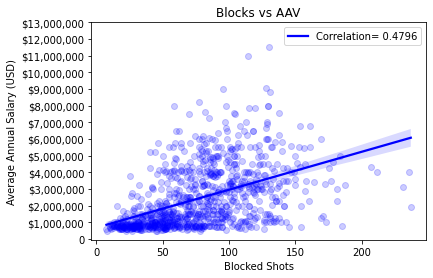

In [116]:
slope, intercept, r_value, p_value, std_err = stats.linregress(defense['BLK'],defense['AAV'])

sns.regplot(data= defense, x='BLK', y='AAV', color='#0000FF',scatter_kws={'alpha': 0.2}, line_kws={'label':"Correlation= %.4f" % r_value})

ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000',
        '$10,000,000','$11,000,000','$12,000,000','$13,000,000']
plt.yticks(ticks=ticks, labels=labels)
plt.xlabel("Blocked Shots")
plt.ylabel('Average Annual Salary (USD)')
plt.title('Blocks vs AAV')
plt.legend()

**GOALIES**

In [76]:
# create goalie df

gdf= df[df['Pos_G']==1]
gdf= gdf[['Player','Season','AGE','GP','GS', 'W', 'L', 'TplusOTL', 'GA','SA','SV', 'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'SOT_Att', 'SOT_Scored','SOT_Saved', 'SOT_Pct', 'PTS', 'TYPE', 'LENGTH', 'AAV']]
gdf= gdf.reset_index()
gdf= gdf.drop(columns= ['index', 'TYPE'])

In [77]:
small_g= gdf[['Player', 'GP','W','SV_Pct','GAA','SUT','GPS','SOT_Pct','AAV']]

In [78]:
                                                      ##### GP #####

Text(0.5, 1.0, 'Fig.) Distribution of Games Played by Goalies')

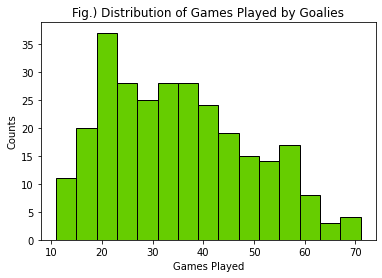

In [79]:
plt.hist(data=small_g, x='GP', bins=15, color='#66CD00', ec='black')
plt.xlabel('Games Played')
plt.ylabel('Counts')
plt.title('Fig.) Distribution of Games Played by Goalies')

In [80]:
                                            ####### Wins ######

In [81]:

wbins=[]
for w in range(0, len(small_g['W'])):
  if small_g['W'][w] < 5:
    wbins.append('0-4')
  elif 5 <= small_g['W'][w] < 10:
    wbins.append('5-9')
  elif 10 <= small_g['W'][w] < 15:
    wbins.append('10-14')
  elif 15 <= small_g['W'][w] < 20:
    wbins.append('15-19')
  elif 20 <= small_g['W'][w] < 25:
    wbins.append('20-24')
  elif 25 <= small_g['W'][w] < 30:
    wbins.append('25-29')
  elif 30 <= small_g['W'][w] < 35:
    wbins.append('30-34')
  elif 35 <= small_g['W'][w] < 40:
    wbins.append('35-39')
  elif 40 <= small_g['W'][w] < 45:
    wbins.append('40-44')
  elif 45 <= small_g['W'][w]:
    wbins.append('45+')


In [82]:
small_g['wbins']=wbins

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Fig.) Goalie Wins vs Annual Salary')

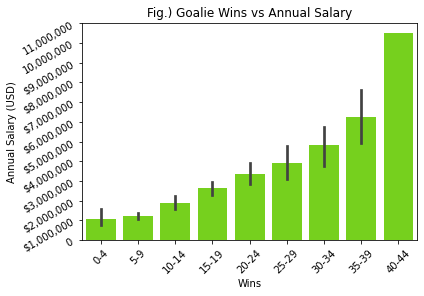

In [83]:
fig= sns.barplot(data=small_g, x='wbins', y='AAV', color='#76EE00',
            order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44'])
fig.set_xticklabels(rotation=45, labels=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44'])
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000','10,000,000','11,000,000']
fig.set_xlabel('Wins')
fig.set_ylabel('Annual Salary (USD)')
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
plt.title('Fig.) Goalie Wins vs Annual Salary')

In [84]:
small_g[small_g['wbins']=='40-44']

,Player,GP,W,SV_Pct,GAA,SUT,GPS,SOT_Pct,AAV,wbins
85,Carey Price,64.666667,41.666667,0.929667,2.05,7.0,15.0,78.766667,10500000.0,40-44


In [85]:
                                              ##### GAA #######

In [86]:
gbins=[]
for g in range(0, len(small_g['GAA'])):
  if small_g['GAA'][g] < 1.70:
    gbins.append('0-1.69')
  elif 1.70 <= small_g['GAA'][g] < 1.80:
    gbins.append('1.70-1.79')
  elif 1.80 <= small_g['GAA'][g] < 1.90:
    gbins.append('1.80-1.89')
  elif 1.90 <= small_g['GAA'][g] < 2.00:
    gbins.append('1.90-1.99')
  elif 2.00 <= small_g['GAA'][g] < 2.10:
    gbins.append('2.00-2.09')
  elif 2.10 <= small_g['GAA'][g] < 2.20:
    gbins.append('2.10-2.19')
  elif 2.20 <= small_g['GAA'][g] < 2.30:
    gbins.append('2.20-2.29')
  elif 2.30 <= small_g['GAA'][g] < 2.40:
    gbins.append('2.30-2.39')
  elif 2.40 <= small_g['GAA'][g] < 2.50:
    gbins.append('2.40-2.49')
  elif 2.50 <= small_g['GAA'][g] < 2.60:
    gbins.append('2.50-2.59')
  elif 2.60 <= small_g['GAA'][g] < 2.70:
    gbins.append('2.60-2.69')
  elif 2.70 <= small_g['GAA'][g] < 2.80:
    gbins.append('2.70-2.79')
  elif 2.80 <= small_g['GAA'][g] < 2.90:
    gbins.append('2.80-2.89')
  elif 2.90 <= small_g['GAA'][g] < 3.00:
    gbins.append('2.90-2.99')
  elif 3.00 <= small_g['GAA'][g] < 3.10:
    gbins.append('3.00-3.09')
  elif 3.10 <= small_g['GAA'][g] < 3.20:
    gbins.append('3.10-3.19')
  elif 3.20 <= small_g['GAA'][g] < 3.30:
    gbins.append('3.20-3.29')
  elif 3.30 <= small_g['GAA'][g] < 3.40:
    gbins.append('3.30-3.39')
  elif 3.40 <= small_g['GAA'][g] < 3.50:
    gbins.append('3.40-3.49')
  elif 3.50 <= small_g['GAA'][g] <= 3.60:
    gbins.append('3.50-3.60')
  





small_g['gbins']=gbins

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Fig.10) Goalies Goals Against Average vs Salary')

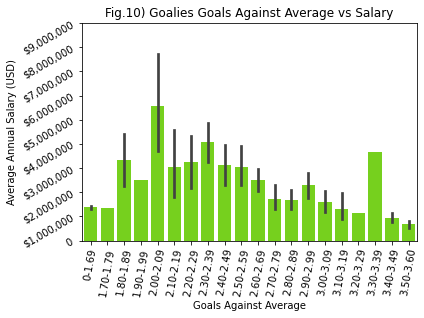

In [87]:
fig= sns.barplot(data=small_g, x='gbins', y='AAV', color='#76EE00',
            order=['0-1.69','1.70-1.79','1.80-1.89','1.90-1.99','2.00-2.09','2.10-2.19','2.20-2.29','2.30-2.39','2.40-2.49','2.50-2.59','2.60-2.69','2.70-2.79','2.80-2.89','2.90-2.99','3.00-3.09','3.10-3.19','3.20-3.29','3.30-3.39','3.40-3.49','3.50-3.60'])
fig.set_xticklabels(rotation=80, labels=['0-1.69','1.70-1.79','1.80-1.89','1.90-1.99','2.00-2.09','2.10-2.19','2.20-2.29','2.30-2.39','2.40-2.49','2.50-2.59','2.60-2.69','2.70-2.79','2.80-2.89','2.90-2.99','3.00-3.09','3.10-3.19','3.20-3.29','3.30-3.39','3.40-3.49','3.50-3.60'])
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000']
fig.set_xlabel('Goals Against Average')
fig.set_ylabel('Average Annual Salary (USD)')
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
plt.title('Fig.10) Goalies Goals Against Average vs Salary')

In [88]:
#jointplot here to show the distribution of amounts of goalies in each bin???

In [89]:
                                                  #### SV% ######

In [90]:
vbins=[]
for v in range(0, len(small_g['SV_Pct'])):
  if small_g['SV_Pct'][v] < 0.880:
    vbins.append('0-0.879')
  elif 0.880 <= small_g['SV_Pct'][v] < 0.885:            
    vbins.append('0.880-0.884')
  elif 0.885 <= small_g['SV_Pct'][v] < 0.890:            
    vbins.append('0.885-0.889')
  elif 0.890 <= small_g['SV_Pct'][v] < 0.895:            
    vbins.append('0.890-0.894')
  elif 0.895 <= small_g['SV_Pct'][v] < 0.900:
    vbins.append('0.895-0.899')
  elif 0.900 <= small_g['SV_Pct'][v] < 0.905:
    vbins.append('0.900-0.904')
  elif 0.905 <= small_g['SV_Pct'][v] < 0.910:
    vbins.append('0.905-0.909')
  elif 0.910 <= small_g['SV_Pct'][v] < 0.915:
    vbins.append('0.910-0.914')
  elif 0.915 <= small_g['SV_Pct'][v] < 0.920:
    vbins.append('0.915-0.919')
  elif 0.920 <= small_g['SV_Pct'][v] < 0.925:
    vbins.append('0.920-0.924')
  elif 0.925 <= small_g['SV_Pct'][v] < 0.930:
    vbins.append('0.925-0.929')
  elif 0.930 <= small_g['SV_Pct'][v] < 0.935:
    vbins.append('0.930-0.934')
  elif 0.935 <= small_g['SV_Pct'][v] < 0.940:
    vbins.append('0.935-0.939')
  elif 0.940 <= small_g['SV_Pct'][v]:
    vbins.append('0.940+')
 
  

small_g['vbins']=vbins



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Fig.11) Goalie Save Percentage vs Salary')

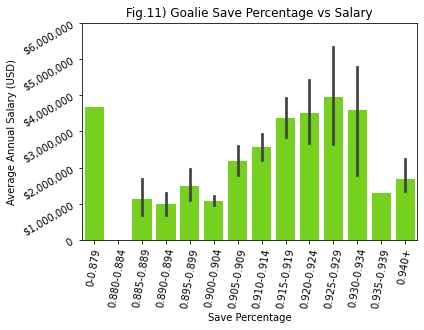

In [91]:
fig= sns.barplot(data=small_g, x='vbins', y='AAV', color='#76EE00',
            order=['0-0.879','0.880-0.884','0.885-0.889','0.890-0.894','0.895-0.899','0.900-0.904','0.905-0.909','0.910-0.914','0.915-0.919','0.920-0.924','0.925-0.929','0.930-0.934','0.935-0.939','0.940+'])
fig.set_xticklabels(rotation=80, labels=['0-0.879','0.880-0.884','0.885-0.889','0.890-0.894','0.895-0.899','0.900-0.904','0.905-0.909','0.910-0.914','0.915-0.919','0.920-0.924','0.925-0.929','0.930-0.934','0.935-0.939','0.940+'])
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000']
fig.set_xlabel('Save Percentage')
fig.set_ylabel('Average Annual Salary (USD)')
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
plt.title('Fig.11) Goalie Save Percentage vs Salary')

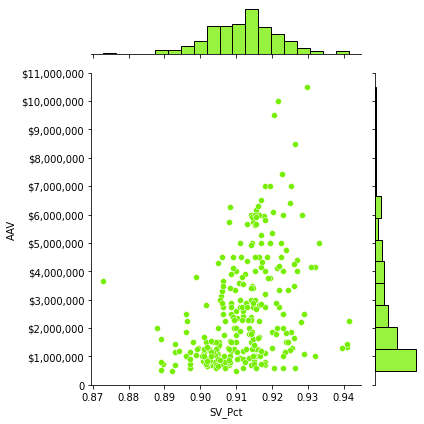

In [92]:


sns.jointplot(data=small_g, x='SV_Pct', y='AAV', color='#76EE00')
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000',
        '$9,000,000','$10,000,000','$11,000,000']
fig.set_xlabel('Save Percentage')
plt.ylabel('Average Annual Salary (USD)')
plt.yticks(ticks=ticks,labels=labels)

#plt.suptitle('Fig.11) Goalie Save Percentage vs Salary')
plt.tight_layout()

In [93]:
sva= small_g[['SV_Pct','AAV']]
sva= sva.query("0.90 < SV_Pct < 0.93")

cor= sva[['SV_Pct','AAV']].corr()
cor  

,SV_Pct,AAV
SV_Pct,1.000000,0.427285
AAV,0.427285,1.000000


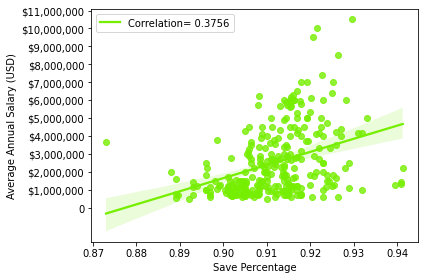

In [94]:


slope, intercept, r_value, p_value, std_err = stats.linregress(small_g['SV_Pct'],small_g['AAV'])

sns.regplot(data=small_g, x='SV_Pct', y='AAV', color='#76EE00', line_kws={'label':"Correlation= %.4f" % r_value})
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000',
        '$9,000,000','$10,000,000','$11,000,000']
plt.xlabel('Save Percentage')
plt.ylabel('Average Annual Salary (USD)')
plt.yticks(ticks=ticks,labels=labels)
plt.legend()

#plt.suptitle('Goalie Save Percentage vs Salary')
plt.tight_layout()

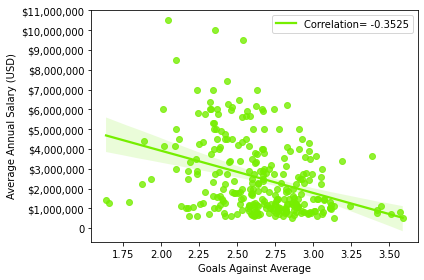

In [95]:
slope, intercept, r_value, p_value, std_err = stats.linregress(small_g['GAA'],small_g['AAV'])

sns.regplot(data=small_g, x='GAA', y='AAV', color='#76EE00', line_kws={'label':"Correlation= %.4f" % r_value})


ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000',
        '$9,000,000','$10,000,000','$11,000,000']
plt.xlabel('Goals Against Average')
plt.ylabel('Average Annual Salary (USD)')
plt.yticks(ticks=ticks,labels=labels)
plt.legend()

#plt.title('Goals Against Average vs Salary')
plt.tight_layout()

In [96]:
                                              #### Shutouts #####

In [97]:
sobins=[]
for so in range(0, len(small_g['SUT'])):
  if small_g['SUT'][so] < 0.5:
    sobins.append('0')
  elif 0.5 <= small_g['SUT'][so] < 1.5:            
    sobins.append('1')
  elif 1.5 <= small_g['SUT'][so] < 2.5:            
    sobins.append('2')
  elif 2.5 <= small_g['SUT'][so] < 3.5:            
    sobins.append('3')
  elif 3.5 <= small_g['SUT'][so] < 4.5:
    sobins.append('4')
  elif 4.5 <= small_g['SUT'][so] < 5.5:
    sobins.append('5')
  elif 5.5 <= small_g['SUT'][so] < 6.5:
    sobins.append('6')
  elif 6.5 <= small_g['SUT'][so] < 7.5:
    sobins.append('7')
  elif 7.5 <= small_g['SUT'][so] < 8.5:
    sobins.append('8')
  elif 8.5 <= small_g['SUT'][so] < 9.5:
    sobins.append('9')
  
 
  

small_g['sobins']=sobins



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Fig.) Goalie Shutouts vs Salary')

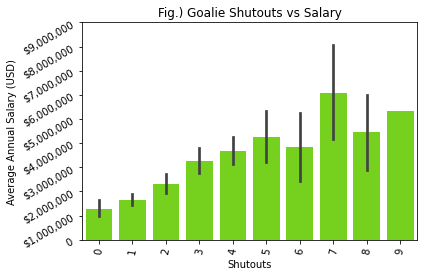

In [98]:
fig= sns.barplot(data=small_g, x='sobins', y='AAV', color='#76EE00',
            order=['0','1','2','3','4','5','6','7','8','9'])
fig.set_xticklabels(rotation=80, labels=['0','1','2','3','4','5','6','7','8','9'])
ticks=[0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000]
labels=['0', '$1,000,000','$2,000,000','$3,000,000','$4,000,000','$5,000,000','$6,000,000','$7,000,000','$8,000,000','$9,000,000']
fig.set_xlabel('Shutouts')
fig.set_ylabel('Average Annual Salary (USD)')
fig.set_yticks(ticks)
fig.set_yticklabels(labels, rotation=30)
plt.title('Fig.) Goalie Shutouts vs Salary')